In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from sklearn import decomposition
%matplotlib inline


In [2]:
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
# PCA
pca = decomposition.PCA(n_components=2)
pca.fit(X)
pca

PCA(n_components=2)

In [4]:
pca.n_components_

2

In [5]:
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [6]:
pca.explained_variance_

array([4.22824171, 0.24267075])

In [7]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [8]:
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [12]:
df = pd.DataFrame(X)
df['y'] = y
df

,0,1,2,3,y
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [23]:
pca_features = pca.transform(X)
df2 = pd.DataFrame(pca_features)
df2 # this is PC1, PC2

labels = {0:'Setosa', 1: 'Versicolour', 2: 'Virginica'}
y = [labels[i] for i in y]

# pd.concat([df, df2])
df2['y'] = y
df2

,0,1,y
0,-2.684126,0.319397,Setosa
1,-2.714142,-0.177001,Setosa
2,-2.888991,-0.144949,Setosa
3,-2.745343,-0.318299,Setosa
4,-2.728717,0.326755,Setosa
...,...,...,...
145,1.944110,0.187532,Virginica
146,1.527167,-0.375317,Virginica
147,1.764346,0.078859,Virginica
148,1.900942,0.116628,Virginica


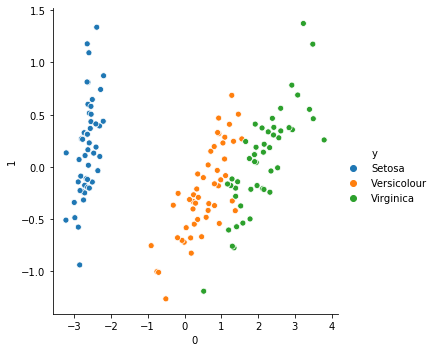

In [26]:
import seaborn as sns
# df2.plot.scatter(x=0,y=1)
sns.relplot(x=0, y=1, hue="y", data=df2);

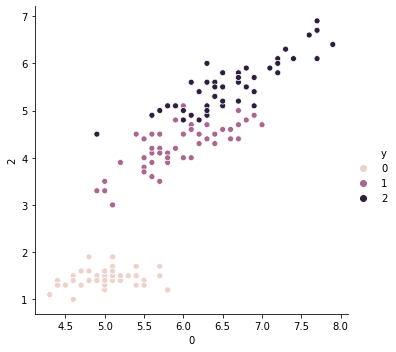

In [28]:
# Check: plot raw feature 1, 3
df
sns.relplot(x=0, y=2, hue="y", data=df);

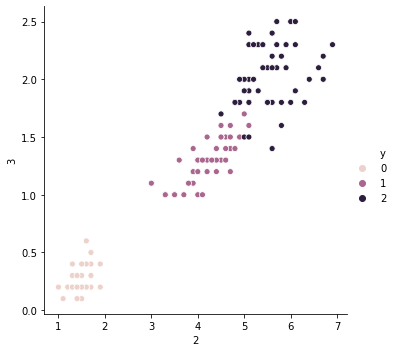

In [29]:
# Check: plot raw feature 3, 4
sns.relplot(x=2, y=3, hue="y", data=df);

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [32]:
# K-means
# Set k=2, PC1,PC2 as variabless
from sklearn.cluster import KMeans


kmean = KMeans(n_clusters=2, random_state=0)
kmean.fit(df2[[0,1]].values)

KMeans(n_clusters=2, random_state=0)

In [34]:
kmean.cluster_centers_

array([[-2.53737542,  0.12775509],
       [ 1.38640101, -0.06980433]])

In [35]:
kmean.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [40]:
# kmean.labels_
df2['k-mean'] = kmean.labels_
df2

,0,1,y,k-mean
0,-2.684126,0.319397,Setosa,0
1,-2.714142,-0.177001,Setosa,0
2,-2.888991,-0.144949,Setosa,0
3,-2.745343,-0.318299,Setosa,0
4,-2.728717,0.326755,Setosa,0
...,...,...,...,...
145,1.944110,0.187532,Virginica,1
146,1.527167,-0.375317,Virginica,1
147,1.764346,0.078859,Virginica,1
148,1.900942,0.116628,Virginica,1


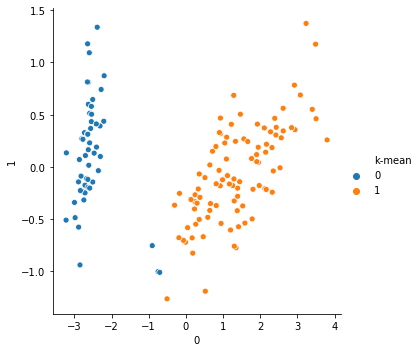

In [41]:

sns.relplot(x=0, y=1, hue="k-mean", data=df2);